<a href="https://colab.research.google.com/github/Peckkie/Experiment_Evaluation_CCA/blob/main/Evaluation_SuspectedCCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# คำสั่ง  drive.mount : เป็นผูก google drive กับ colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir( '/content/drive/MyDrive/CCA_Project')
!pwd

/content/drive/MyDrive/CCA_Project


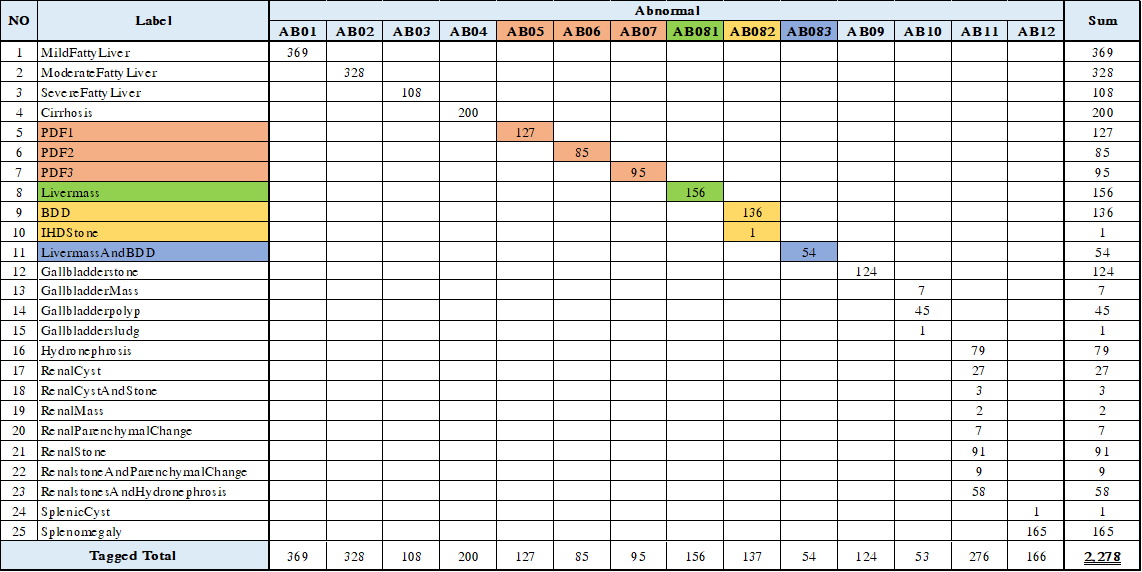

# Suspected CCA
- pdf(PDF1, PDF2, PDF3) 
- mass (Livermass) 
- BDD(BDD, IHDStone)

AB05: PDF1	
 
AB06: PDF2

AB07: PDF3

AB081: Livermass

AB082: BDD, IHDStone


## แบบ 1: 2 Class
- 3 CCA Class
- 12AB+Normal Class

### Testset

In [ ]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Testdf_15ABrf.csv')
RFdf.head(3)

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect


In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']

In [ ]:
a_ = RFdf['15AB_category'].tolist()
AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)

a_ = RFdf['Sub_class'].tolist()
Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a) 

RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [ ]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= RFdf['Act_Predic_CCA'].array
pred = RFdf['AI_Predic_CCA'].array
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 95.57926829268293%
                  precision    recall  f1-score   support

Non_SuspectedCCA       0.96      0.99      0.98      1170
    SuspectedCCA       0.94      0.63      0.76       142

        accuracy                           0.96      1312
       macro avg       0.95      0.81      0.87      1312
    weighted avg       0.96      0.96      0.95      1312



[[1164    6]
 [  52   90]]


Text(0.5, 20.59375, 'Predicted label')

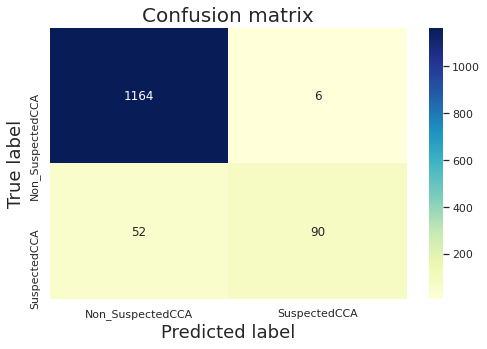

In [ ]:

#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
print(cm)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### Testset:150

#### AI

In [ ]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
a_ = RFdf['category'].tolist()
AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)

a_ = RFdf['Sub_class_New'].tolist()
Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a) 

RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [ ]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= RFdf['Act_Predic_CCA'].array
pred = RFdf['AI_Predic_CCA'].array
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 93.33333333333333%
                  precision    recall  f1-score   support

Non_SuspectedCCA       0.95      0.98      0.96       132
    SuspectedCCA       0.79      0.61      0.69        18

        accuracy                           0.93       150
       macro avg       0.87      0.79      0.83       150
    weighted avg       0.93      0.93      0.93       150



[[129   3]
 [  7  11]]


Text(0.5, 20.59375, 'Predicted label')

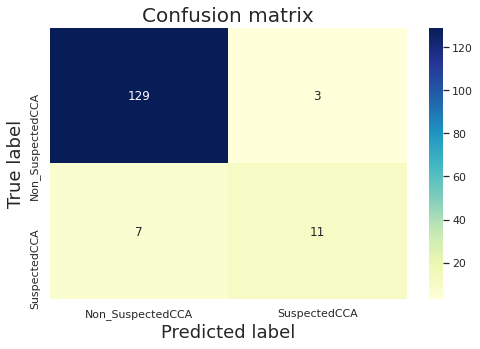

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
print(cm)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#### Experiment

In [ ]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
per =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U11_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
name_ass =[]
for j in per:
    a = j.split('_')[0]
    a_ = RFdf[j].tolist()
    aa = a+'_Ass'
    name_ass.append(aa)
    Act_Predic =[]
    for  i in range(len(a_)):
        if a_[i] in Suspected_CCA:
            a = 'SuspectedCCA'
            Act_Predic.append(a)
        else:
            a = 'Non_SuspectedCCA'
            Act_Predic.append(a) 
    RFdf[aa] = Act_Predic

In [ ]:
per  = ['B10_Pred1','B11_Pred2','B12_Pred2','U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
name_unass =[]
for j in per:
    a = j.split('_')[0]
    a_ = RFdf[j].tolist()
    aa = a+'_Unass'
    name_unass.append(aa)
    Act_Predic =[]
    for  i in range(len(a_)):
        if a_[i] in Suspected_CCA:
            a = 'SuspectedCCA'
            Act_Predic.append(a)
        else:
            a = 'Non_SuspectedCCA'
            Act_Predic.append(a) 
    RFdf[aa] = Act_Predic

In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']

a_ = RFdf['Sub_class_New'].tolist()
Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a) 

RFdf['Act_Predic_CCA'] = Act_Predic

##### Ass

In [ ]:
per = name_ass
aa = list()
df=RFdf
for j in per:
    act = df['Act_Predic_CCA'].array;
    pred = df[j].array;
    cmat = confusion_matrix(act, pred);
    acc = (np.trace(cmat))/(np.sum(cmat));
    Recall = classification_report(act, pred).split()[-9];
    Prec = classification_report(act, pred).split()[-10]; 
    aa.append({'per':j,'tagName':'UnAss','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)});
df1 = pd.DataFrame(aa);
df1

,per,tagName,acc,Prec,Recall,count
0,B10_Ass,UnAss,0.913333,0.79,0.88,150
1,B11_Ass,UnAss,0.753333,0.61,0.72,150
2,B12_Ass,UnAss,0.820000,0.67,0.80,150
3,U10_Ass,UnAss,0.920000,0.82,0.79,150
4,U11_Ass,UnAss,0.946667,0.87,0.87,150
5,U20_Ass,UnAss,0.946667,0.85,0.95,150
6,U21_Ass,UnAss,0.900000,0.76,0.80,150
7,U30_Ass,UnAss,0.946667,0.89,0.85,150
8,U31_Ass,UnAss,0.953333,0.86,0.97,150
9,U40_Ass,UnAss,0.960000,0.89,0.93,150


##### Unass

In [ ]:
per = name_unass
aa = list()
df=RFdf
for j in per:
    act = df['Act_Predic_CCA'].array;
    pred = df[j].array;
    cmat = confusion_matrix(act, pred);
    acc = (np.trace(cmat))/(np.sum(cmat));
    Recall = classification_report(act, pred).split()[-9];
    Prec = classification_report(act, pred).split()[-10]; 
    aa.append({'per':j,'tagName':'UnAss','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)});
df1 = pd.DataFrame(aa);
df1

,per,tagName,acc,Prec,Recall,count
0,B10_Unass,UnAss,0.793333,0.62,0.69,150
1,B11_Unass,UnAss,0.700000,0.61,0.73,150
2,B12_Unass,UnAss,0.693333,0.58,0.68,150
3,U10_Unass,UnAss,0.813333,0.66,0.77,150
4,U11_Unass,UnAss,0.866667,0.71,0.80,150
5,U20_Unass,UnAss,0.813333,0.65,0.75,150
6,U21_Unass,UnAss,0.880000,0.75,0.91,150
7,U30_Unass,UnAss,0.973333,0.94,0.94,150
8,U31_Unass,UnAss,0.946667,0.86,0.92,150
9,U40_Unass,UnAss,0.966667,0.91,0.93,150


In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
a_ = RFdf['category'].tolist()
AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)

a_ = RFdf['Sub_class_New'].tolist()
Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a) 
RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [ ]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= RFdf['Act_Predic_CCA'].array
pred = RFdf['AI_Predic_CCA'].array
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

## แบบ 2: 3 Class
- 3 CCA

- 12AB

- Normal

### Testset

In [ ]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Testdf_15ABrf.csv')
RFdf.head(3)

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect


In [ ]:
print(set(RFdf['Sub_class']))

{'AB05', 'AB07', 'AB09', 'AB01', 'AB11', 'AB04', 'AB081', 'AB06', 'AB082', 'AB12', 'AB083', 'AB02', 'AB10', 'Normal', 'AB03'}


In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
Non_Suspected_CCA = ['AB01','AB02','AB03', 'AB04','AB09', 'AB10', 'AB11','AB12']

In [ ]:
a_ = RFdf['15AB_category'].tolist()

AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Normal'
        AI_Predic.append(a) 

a_ = RFdf['Sub_class'].tolist()

Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Normal'
        Act_Predic.append(a) 

RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [ ]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= RFdf['Act_Predic_CCA'].array
pred = RFdf['AI_Predic_CCA'].array
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 91.84451219512195%
                  precision    recall  f1-score   support

Non_SuspectedCCA       0.97      0.84      0.90       313
          Normal       0.90      0.99      0.95       857
    SuspectedCCA       0.94      0.63      0.76       142

        accuracy                           0.92      1312
       macro avg       0.94      0.82      0.87      1312
    weighted avg       0.92      0.92      0.91      1312



[[263  46   4]
 [  3 852   2]
 [  6  46  90]]


Text(0.5, 20.59375, 'Predicted label')

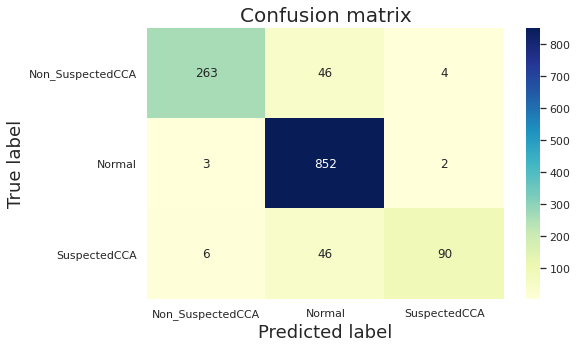

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
print(cm)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### Testset:150


##### AI

In [ ]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [ ]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
Non_Suspected_CCA = ['AB01','AB02','AB03', 'AB04','AB09', 'AB10', 'AB11','AB12']
a_ = RFdf['category'].tolist()

AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Normal'
        AI_Predic.append(a) 

a_ = RFdf['Sub_class_New'].tolist()

Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Normal'
        Act_Predic.append(a) 

RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [ ]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= RFdf['Act_Predic_CCA'].array
pred = RFdf['AI_Predic_CCA'].array
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.66666666666667%
                  precision    recall  f1-score   support

Non_SuspectedCCA       0.96      0.92      0.94        24
          Normal       0.94      0.98      0.96       108
    SuspectedCCA       0.79      0.61      0.69        18

        accuracy                           0.93       150
       macro avg       0.89      0.84      0.86       150
    weighted avg       0.92      0.93      0.92       150



[[ 22   0   2]
 [  1 106   1]
 [  0   7  11]]


Text(0.5, 20.59375, 'Predicted label')

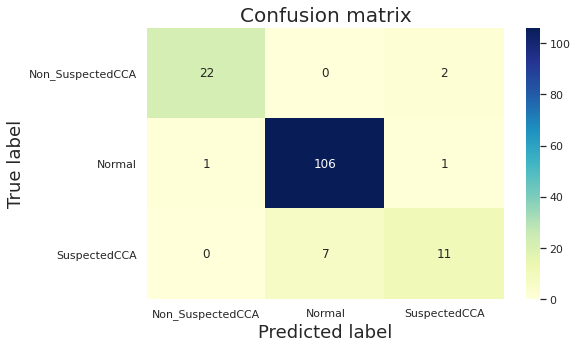

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
print(cm)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

##### Experiment

In [8]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Experiment2_AI.csv')
RFdf.head(3)

,Unnamed: 0,num,FileName,sub_class,views,Path Crop,originalImage,tagName1,tagName2,Class,Case,Abs Position,Sub_class,Path Full,fold,AI_Pred,U10_Pred,U11_Pred,tagName0,Sub_class_New,Top3_category,Top3_Prob,category,Prob,FP_category,U31_Pred_ass,U30_Pred,U41_Pred,U21_Pred,U40_Pred_ass,U20_Pred_ass,U10_Pred2_ass,U11_Pred2,U30_Pred2_ass,U41_Pred2_ass,U31_Pred2,U40_Pred2,U20_Pred2,U21_Pred2_ass,B10_Pred1,B11_Pred1_ass,B12_Pred1_ass,B10_Pred2_ass,B11_Pred2,B12_Pred2
0,0,1,AB01 P1 C100.JPG,AB01,FP-A,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,100,P1,P1,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,2,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'AB082']","[0.5297411700821869, 0.20299334374021513, 0.07...",AB02,0.529741,FP-A,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB03,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01
1,1,2,AB01 P4-2 C050.JPG,AB01,FP-B,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,50,P4,P42,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB02,Normal,AB02,Easy,AB01,"['AB02', 'AB01', 'Normal']","[0.5384400113893146, 0.23439530764208472, 0.03...",AB02,0.538440,FP-B,AB02,AB02,AB02,AB02,AB02,AB02,AB02,AB01,AB02,AB02,AB02,AB02,AB01,AB02,AB01,AB01,AB02,AB02,AB01,Normal
2,2,3,AB01 P5-2 C004.JPG,AB01,FP-C,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,https://irisprodseatraining.blob.core.windows....,Easy,Easy,Abnormal,4,P5,P52,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,1,AB01,AB03,AB02,Easy,AB01,"['AB01', 'Normal', 'AB082']","[0.8420314338368775, 0.03463969852508276, 0.02...",AB01,0.842031,FP-C,AB01,AB02,AB02,AB02,AB01,AB01,AB01,AB02,AB01,AB02,AB02,AB02,AB01,AB01,AB11,AB02,AB01,AB01,AB02,Normal


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Normal'
        Act_Predic.append(a) 

RFdf['Act_Predic_CCA'] = Act_Predic

##### Ass

In [11]:
per =['B10_Pred2_ass','B11_Pred1_ass','B12_Pred1_ass','U10_Pred2_ass','U11_Pred','U20_Pred_ass','U21_Pred2_ass','U30_Pred2_ass','U31_Pred_ass','U40_Pred_ass','U41_Pred2_ass']
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
Non_Suspected_CCA = ['AB01','AB02','AB03', 'AB04','AB09', 'AB10', 'AB11','AB12']
name_ass =[]
for j in per:
    a = j.split('_')[0]
    a_ = RFdf[j].tolist()
    aa = a+'_Ass'
    name_ass.append(aa)
    Act_Predic =[]
    for  i in range(len(a_)):
        if a_[i] in Suspected_CCA:
            a = 'SuspectedCCA'
            Act_Predic.append(a)
        elif a_[i] in Non_Suspected_CCA:
            a = 'Non_SuspectedCCA'
            Act_Predic.append(a)
        else:
            a = 'Normal'
            Act_Predic.append(a) 

    RFdf[aa] = Act_Predic

In [12]:
per = name_ass
aa = list()
df=RFdf
for j in per:
    act = df['Act_Predic_CCA'].array;
    pred = df[j].array;
    cmat = confusion_matrix(act, pred);
    acc = (np.trace(cmat))/(np.sum(cmat));
    Recall = classification_report(act, pred).split()[-9];
    Prec = classification_report(act, pred).split()[-10]; 
    aa.append({'per':j,'tagName':'UnAss','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)});
df1 = pd.DataFrame(aa);
df1

,per,tagName,acc,Prec,Recall,count
0,B10_Ass,UnAss,0.766667,0.69,0.83,150
1,B11_Ass,UnAss,0.573333,0.53,0.66,150
2,B12_Ass,UnAss,0.640000,0.59,0.73,150
3,U10_Ass,UnAss,0.746667,0.68,0.74,150
4,U11_Ass,UnAss,0.826667,0.75,0.79,150
5,U20_Ass,UnAss,0.680000,0.62,0.74,150
6,U21_Ass,UnAss,0.840000,0.76,0.89,150
7,U30_Ass,UnAss,0.920000,0.89,0.90,150
8,U31_Ass,UnAss,0.746667,0.66,0.77,150
9,U40_Ass,UnAss,0.853333,0.78,0.81,150


##### Unass

In [13]:
per  = ['B10_Pred1','B11_Pred2','B12_Pred2','U10_Pred','U11_Pred2','U20_Pred2','U21_Pred','U30_Pred','U31_Pred2','U40_Pred2','U41_Pred']
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
Non_Suspected_CCA = ['AB01','AB02','AB03', 'AB04','AB09', 'AB10', 'AB11','AB12']
name_unass =[]
for j in per:
    a = j.split('_')[0]
    a_ = RFdf[j].tolist()
    aa = a+'_Unass'
    name_unass.append(aa)
    Act_Predic =[]
    for  i in range(len(a_)):
        if a_[i] in Suspected_CCA:
            a = 'SuspectedCCA'
            Act_Predic.append(a)
        elif a_[i] in Non_Suspected_CCA:
            a = 'Non_SuspectedCCA'
            Act_Predic.append(a)
        else:
            a = 'Normal'
            Act_Predic.append(a) 
    RFdf[aa] = Act_Predic

In [14]:
per = name_unass
aa = list()
df=RFdf
for j in per:
    act = df['Act_Predic_CCA'].array;
    pred = df[j].array;
    cmat = confusion_matrix(act, pred);
    acc = (np.trace(cmat))/(np.sum(cmat));
    Recall = classification_report(act, pred).split()[-9];
    Prec = classification_report(act, pred).split()[-10]; 
    aa.append({'per':j,'tagName':'UnAss','acc':acc,'Prec':Prec,'Recall':Recall,'count':len(act)});
df1 = pd.DataFrame(aa);
df1

,per,tagName,acc,Prec,Recall,count
0,B10_Unass,UnAss,0.226667,0.32,0.44,150
1,B11_Unass,UnAss,0.420000,0.44,0.53,150
2,B12_Unass,UnAss,0.306667,0.39,0.47,150
3,U10_Unass,UnAss,0.466667,0.48,0.58,150
4,U11_Unass,UnAss,0.753333,0.65,0.73,150
5,U20_Unass,UnAss,0.480000,0.50,0.62,150
6,U21_Unass,UnAss,0.580000,0.58,0.74,150
7,U30_Unass,UnAss,0.820000,0.75,0.82,150
8,U31_Unass,UnAss,0.693333,0.62,0.72,150
9,U40_Unass,UnAss,0.806667,0.73,0.79,150


#Graph 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot, show, title, xlabel, ylabel
from pylab import legend
from pylab import axis

## แบบ 1: 2Class

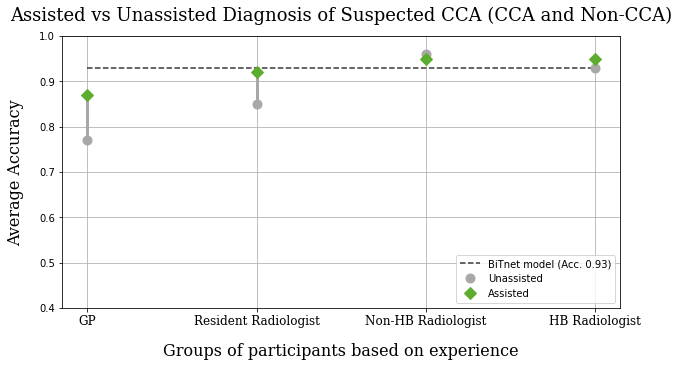

In [29]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 = [0.87, 0.92, 0.95, 0.95]
unass_2  = [0.77,0.85,0.96,0.93]
ai = [0.93,0.93,0.93,0.93]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)
# Y1=[]
# for i in range(len(AIass)):
#     a = [AIass[i],AIunass[i]]
#     Y1.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.93)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#5cac2d',  linestyle=' ', marker='D', markeredgecolor='#5cac2d', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA and Non-CCA)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Accuracy',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()

In [ ]:
ass_2 =[0.75,0.81,0.88,0.89]
unass_2  = [0.64,0.70,0.90,0.83]

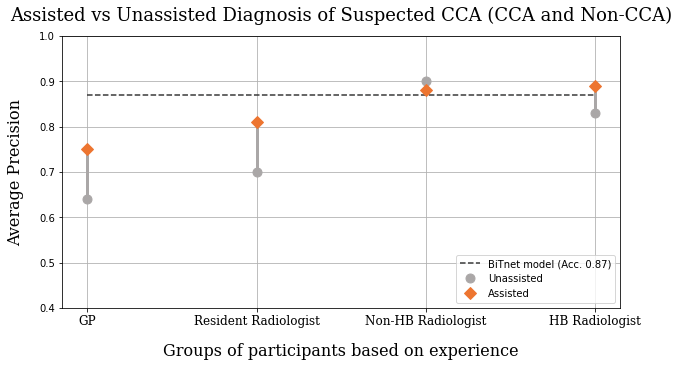

In [35]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 =[0.75,0.81,0.88,0.89]
unass_2  = [0.64,0.70,0.90,0.83]
ai = [0.87,0.87,0.87,0.87]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.87)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#ED7530',  linestyle=' ', marker='D', markeredgecolor='#ED7530', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA and Non-CCA)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Precision',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()

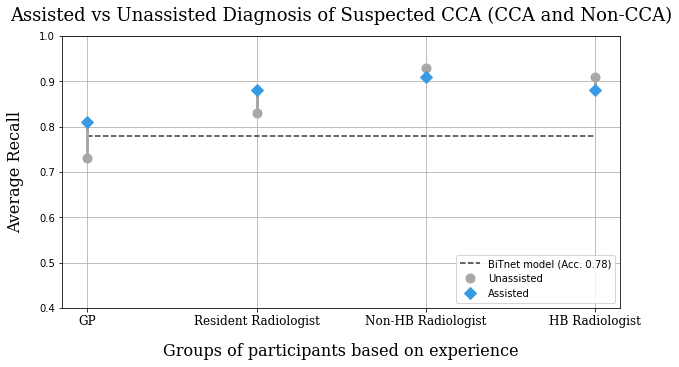

In [36]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 =[0.81,0.88,0.91,0.88]
unass_2  = [0.73,0.83,0.93,0.91]
ai = [0.78,0.78,0.78,0.78]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.78)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#389AE3',  linestyle=' ', marker='D', markeredgecolor='#389AE3', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA and Non-CCA)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Recall',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()

## แบบ 2: 3 Class

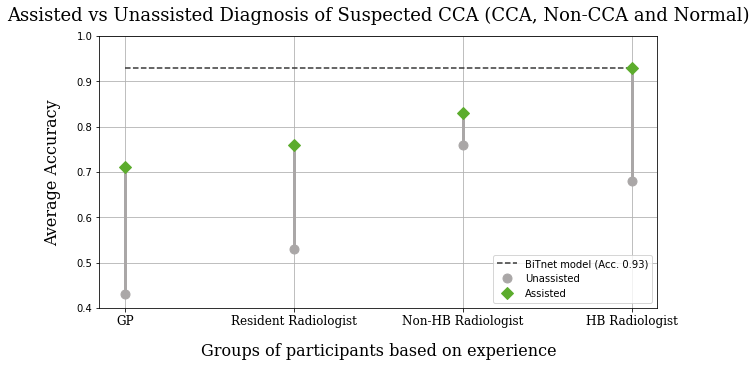

In [30]:
ont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 = [0.71,0.76,0.83,0.93]
unass_2  = [0.43,0.53,0.76,0.68]
ai = [0.93,0.93,0.93,0.93]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)
# Y1=[]
# for i in range(len(AIass)):
#     a = [AIass[i],AIunass[i]]
#     Y1.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.93)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#5cac2d',  linestyle=' ', marker='D', markeredgecolor='#5cac2d', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA, Non-CCA and Normal)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Accuracy',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()

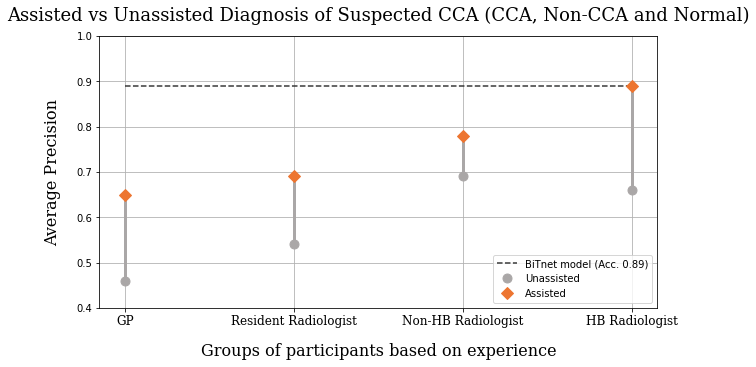

In [37]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 =[0.65,0.69,0.78,0.89]
unass_2  = [0.46,0.54,0.69,0.66]
ai = [0.89,0.89,0.89,0.89]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.89)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#ED7530',  linestyle=' ', marker='D', markeredgecolor='#ED7530', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA, Non-CCA and Normal)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Precision',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()

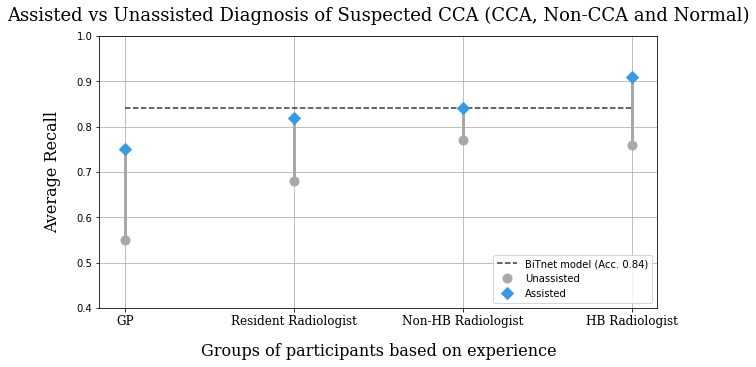

In [38]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
        
fig, ax = plt.subplots(figsize=(10, 5))

ass_2 =[0.75,0.82,0.84,0.91]
unass_2  = [0.55,0.68,0.77,0.76]
ai = [0.84,0.84,0.84,0.84]
X = [[0,0],[0.5,0.5],[1,1],[1.5,1.5]]
Y=[]
for i in range(len(ass_2)):
    a = [ass_2[i],unass_2[i]]
    Y.append(a)

plt.ylim(0.4,1) 
x = np.arange(0,2,0.5)  

plt.plot(x, ai , color='#363737',  linestyle='--', linewidth=1.5, label='BiTnet model (Acc. 0.84)')

for i in range(len(X)):
    plt.plot(X[i], Y[i] , color='#AAA7A7',  linestyle='-', linewidth=3)

plt.plot(x, unass_2, color='#AAA7A7',  linestyle=' ', marker='o', markeredgecolor='#AAA7A7', markersize=9, label='Unassisted')
plt.plot(x, ass_2, color='#389AE3',  linestyle=' ', marker='D', markeredgecolor='#389AE3', markersize=8, label='Assisted')

# legend(['Unassisted', 'Assisted'], bbox_to_anchor=(1.17,1.))
plt.title('Assisted vs Unassisted Diagnosis of Suspected CCA (CCA, Non-CCA and Normal)',fontsize=18, fontdict=font, pad=15) 
plt.xlabel('Groups of participants based on experience',fontsize=16, fontdict=font,  labelpad=15)
plt.ylabel('Average Recall',fontsize=16, fontdict=font,  labelpad=15)
ax.set_xticks(x)
labels = ['GP', 'Resident Radiologist','Non-HB Radiologist','HB Radiologist']
ax.set_xticklabels(labels,fontsize=12, fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
show()